<a href="https://colab.research.google.com/github/matheuspercario/TT050-SAD/blob/main/Aula04-PraticaTensorflow/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao TensorFlow

In [1]:
# Biblioteca TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Biblioteca auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
# Pegar imagens (FASHION_MNIST) de treino e teste 
fashion_mnist = keras.datasets.fashion_mnist

# Imagens e rotulacao (label) das img
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Nomes das classes (rotulos) de cada imagem
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Pré-processamento

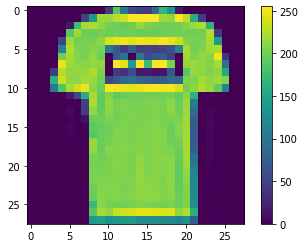

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Dividindo por 255 com o intuito de binarizar a imagem (0 e 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

Após realizar a divisão, perceba que se plotar a mesma imagem acima novamente, a escala (`colorbar()`) vai de 0 a 1 e não de 0 a 255.

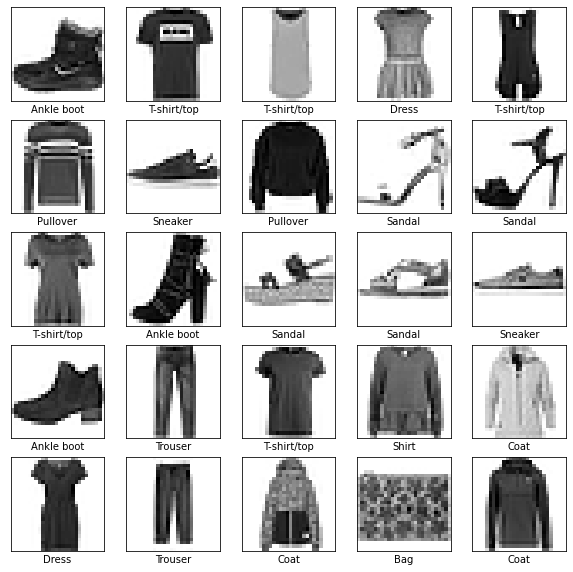

In [11]:
# Plotando as 25 primeiras imagens binarizadas (matplotlib)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # Binarização
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

#### Montar as camadas 
O principal bloco de construção da rede neural é a camada (layer). As camadas (layers) extraem representações dos dados inseridos na rede.
Com sorte, essas representações são significativas para o problema a mão.


In [12]:
# Três redes neurais para criação do modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#### Camada Flatten
Transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os coloque em uma única fileira. Essa camada não tem paramêtros para aprender; ela só reformata os dados.


#### Camadas Dense
A primeira camada Dense tem 128 nós (ou neurônios). A segunda (e última) camada é uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contem um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

## Compilar o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de compilação.


In [13]:
# Ainda é preciso alguns ajustes no modelo treinado, os ajustes são feitos na compilação do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Função *Loss*

Essa mede quão preciso o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para direção certa.


## Treinar o modelo

Treinar a rede neural requer os seguintes passos:
  - Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays `train_images` e `train_labels`.
  - O modelo aprende como associar as imagens as labels.
  - Perguntamos ao modelo para fazer previsões sobre o conjunto de teste – nesse exemplo, o array `test_images`. Verificamos se as previsões combinaram com as labels do array `test_labels`.

Para começar a treinar, chame o método `model.fit` – assim chamado, porque ele “encaixa” o modelo no conjunto de treinamento.

In [14]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5016 - accuracy: 0.8243
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3791 - accuracy: 0.8631
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3397 - accuracy: 0.8753
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3148 - accuracy: 0.8845
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.8917
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2824 - accuracy: 0.8956
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2688 - accuracy: 0.9014
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2593 - accuracy: 0.9045
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2470 - accuracy: 0.9076
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

À medida que o modelo treina, as métricas loss e acurácia são mostradas. O modelo atinge uma acurácia de 0.93 (ou 93%) com o conjunto de treinamento.

## Avaliar o modelo

Depois, compare como o modelo performou com o conjunto de teste.

Acabou que a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um *overfitting*. 



**Overfitting** - *é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.*


In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f'\nTest accuracy: {test_acc}\nTest loss: {test_loss}')

313/313 - 0s - loss: 0.3893 - accuracy: 0.8781

Test accuracy: 0.8780999779701233
Test loss: 0.3893013298511505


## Predizer com o modelo

Com o modelo treinado, o usaremos para predições de algumas imagens.

Aqui, o modelo previu que a label de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:


In [16]:
predictions = model.predict(test_images)

In [47]:
predictions[0]

array([5.8070211e-15, 2.1007603e-13, 4.0429162e-13, 1.3902290e-14,
       3.9927290e-13, 6.0482148e-07, 4.7364760e-13, 3.9593506e-04,
       7.7487707e-13, 9.9960345e-01], dtype=float32)

A predição é um array de 10 números. Eles representam a confiança do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada label tem um maior valor de confiança:

In [46]:
np.argmax(predictions[0])

9

Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou class_names[9]. Examinando a label do teste, vemos que essa classificação é correta:

In [49]:
test_labels[0]

9

### Gráfico das predições
Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

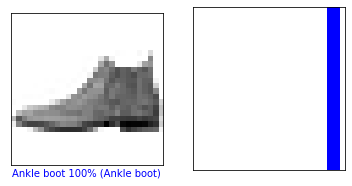

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

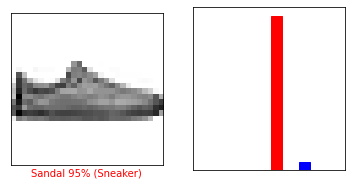

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

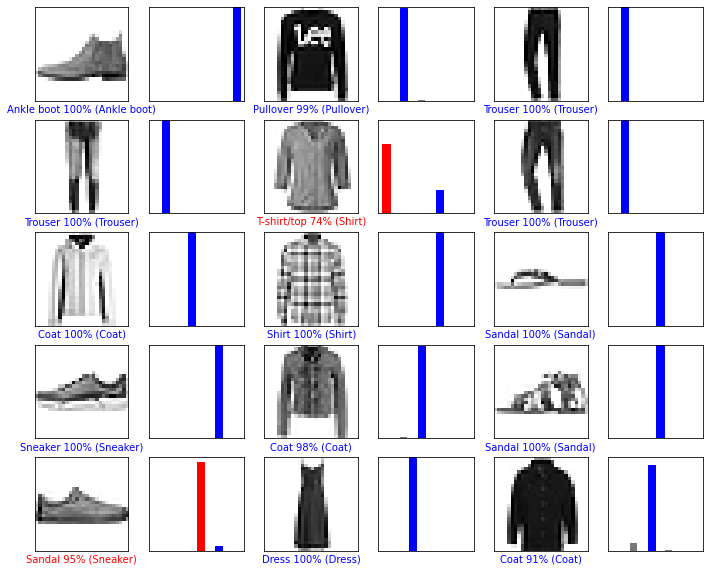

In [23]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

### Predizendo única imagem
Finalmente, use o modelo treinado para fazer a predição de uma única imagem.

Modelos tf.keras são otimizados para fazer predições em um batch, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

In [24]:
# Pegue uma imagem do conjunto de dados de teste.
img = test_images[0]
print(img.shape)

(28, 28)


In [25]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora prediremos a label correta para essa imagem:


In [26]:
predictions_single = model.predict(img)
print(predictions_single)

[[5.8070211e-15 2.1007683e-13 4.0429238e-13 1.3902316e-14 3.9927290e-13
  6.0482319e-07 4.7364760e-13 3.9593488e-04 7.7487702e-13 9.9960345e-01]]


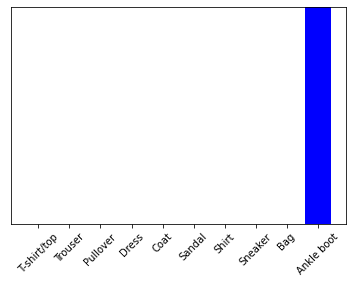

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`modelo.predict` retorna a lista de listas – uma lista para cada imagem em um batch de dados. Pegue a predição de nossa (unica) imagem no batch:


In [28]:
np.argmax(predictions_single[0])

9

E, como antes, o modelo previu a label como 9
